# Project for Machine Learning no.1
*Filip Jovanović*
## Analysis of laptop parameters dataset

***Requirements:***
Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review.Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
nal data if needed

### Sections required in report:
- [x] Brief description of the data set and a summary of its attributes
- [x] Initial plan for data exploration
- [x] Actions taken for data cleaning and feature engineering
- [x] Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
- [x] Formulating at least 3 hypothesis about this data
- [x] Conducting a formal significance test for one of the hypotheses and discuss the results 
- [x] Suggestions for next steps in analyzing this data
- [x] A paragraph that summarizes the quality of this data set and a request for additional data if needed

## (1) Summary of the data set and its atributes
*(text and tadatset taken from [Kaggle](https://www.kaggle.com/datasets/sagaraiarchitect/laptop-price-explorer-the-ml-model/data))*
### Context
This data set is taken as an example Exploratory Data Analysis project for Machine Learning course 

### Content
Explore the dynamic world of laptops with our comprehensive dataset that delves into the intricate details of various portable computing devices. This dataset is a treasure trove of information for tech enthusiasts, market analysts, and anyone interested in understanding the diverse landscape of laptops.

## (2) Initial plan for data exploration
1. Check the structure of the data
2. Check for missing values and how to treat them
3. See the corelation between features
4. See how to transform the non-numeric values
5. Check for outliers and how to scale data or if possible remove utliers
6. Check what features are redundant
7. See if any values need transormations (spliting strings or date-time transformation)

In [277]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [278]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt

from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from scipy import stats

path = 'data/laptops.csv'

data = pd.read_csv(path, low_memory = False)
data.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566


In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       1000 non-null   object 
 1   TypeOfLaptop      1000 non-null   object 
 2   Inches            1000 non-null   float64
 3   ScreenResolution  1000 non-null   object 
 4   Cpu               1000 non-null   object 
 5   Ram               1000 non-null   object 
 6   Memory            1000 non-null   object 
 7   Gpu               1000 non-null   object 
 8   OpSys             1000 non-null   object 
 9   Weight            1000 non-null   float64
 10  Price             1000 non-null   float64
dtypes: float64(3), object(8)
memory usage: 86.1+ KB


In [280]:
data.isnull().sum()

CompanyName         0
TypeOfLaptop        0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In above output we checked for potential missing values to check if we will need to do dropping or replacement of some null values.

In [281]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1000.0,14.496646,2.066624,11.005842,12.677791,14.509298,16.313026,17.998786
Weight,1000.0,3.469800,0.857112,2.000819,2.720228,3.477824,4.189891,4.994556
Price,1000.0,51602.255339,13802.833231,30060.275100,40376.617670,50683.971717,61897.280126,115137.368077


In [282]:
dups = data.duplicated()
sum(dups)


0

In above output we can see that there is 0 duplicated values

In [283]:
num_vals = data.select_dtypes(include='number')
str_vals = data.select_dtypes(include='object')
num_vals

,Inches,Weight,Price
0,17.040680,2.064834,35844.099371
1,16.542395,4.060656,37019.059051
2,17.295294,2.901689,33329.360341
3,11.526203,2.914843,68631.102486
4,12.649634,4.341995,33842.479566
...,...,...,...
995,16.242566,4.685053,40254.533272
996,17.450809,3.934182,57272.697780
997,13.761288,4.047468,48214.606894
998,11.038000,3.669825,58926.553683


In [284]:
str_vals

,CompanyName,TypeOfLaptop,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys
0,MSI,Business Laptop,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux
1,Chuwi,2 in 1 Convertible,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS
2,hp,WorkStation,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux
3,MSI,2 in 1 Convertible,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10
4,Microsoft,Gaming,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10
...,...,...,...,...,...,...,...,...
995,hp,Gaming,HD 1920x1080,AMD A9-Series 9420,8GB,128GB SSD,AMD Radeon RX 5600M,Windows 10
996,Microsoft,WorkStation,4K,Intel Celeron Dual Core 3855U,8GB,2TB SATA SSD,NVIDIA GeForce GTX 1650,macOS
997,lenevo,NoteBook,HD 1920x1080,AMD Ryzen 7,16GB,128GB PCIe SSD,NVIDIA GeForce GTX 1650,Windows 10
998,Asus,UltraBook,IPS Panel Retina Display 2560x1600,Intel Core i9,12GB,1TB Fusion Drive,Intel Iris Xe Graphics,No OS


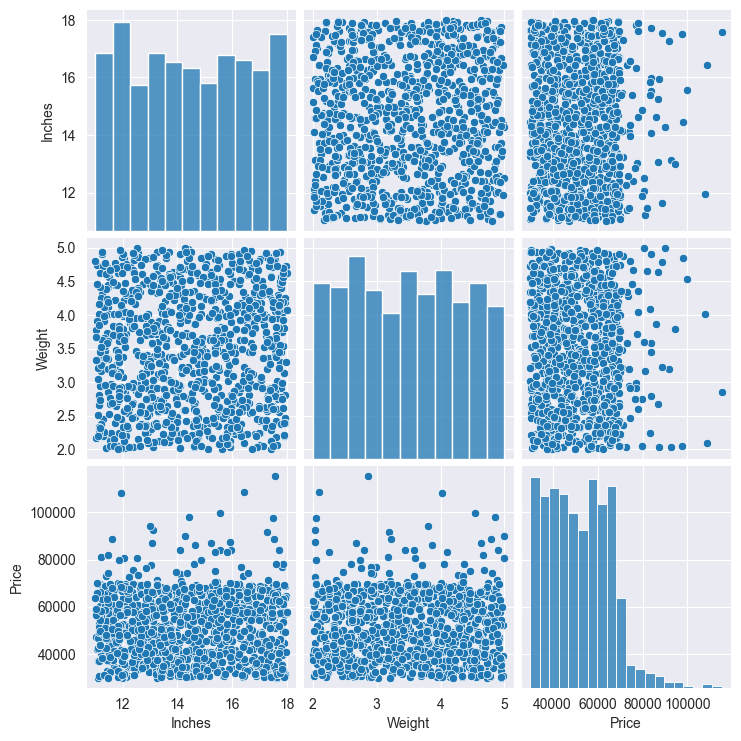

In [285]:
sns.pairplot(num_vals)

<Axes: >

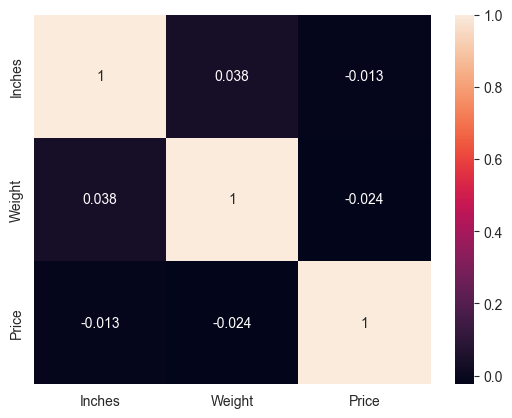

In [286]:
sns.heatmap(num_vals.corr(), annot=True)

<Axes: ylabel='Price'>

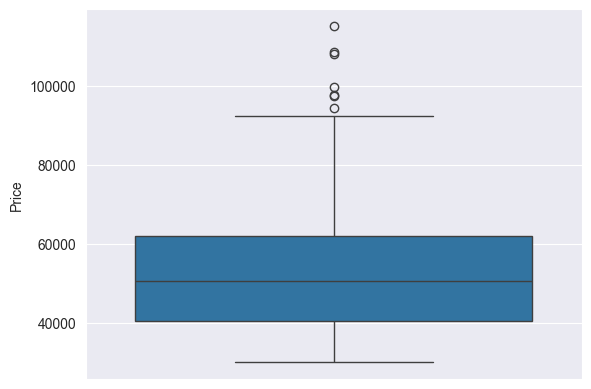

In [287]:
sns.boxplot(data=num_vals['Price'])

In [288]:
num_vals.corr()

,Inches,Weight,Price
Inches,1.000000,0.037982,-0.012535
Weight,0.037982,1.000000,-0.024256
Price,-0.012535,-0.024256,1.000000


### Observation 1

From given plots of initial dataset numeric values we see negative and positive low correlation between weight and inches and price that is our target.
We can also see that our target column *Prices* contains a few outliers      

### Next step

Because of unreliable numerical data we will need to transform string data to numeric data to see if there is any correlation between those features and our target.

In [289]:
names_str = []
unique_names = []
for cols in str_vals.columns:
    print(cols)
    names_str.append(cols)
    display(str_vals[cols].unique())
    unique_names.append(str_vals[cols].unique())

CompanyName


array(['MSI', 'Chuwi', 'hp', 'Microsoft', 'Apple', 'lenevo', 'Asus',
       'Acer', 'Dell'], dtype=object)

TypeOfLaptop


array(['Business Laptop', '2 in 1 Convertible', 'WorkStation', 'Gaming',
       'NoteBook', 'UltraBook'], dtype=object)

ScreenResolution


array(['IPS Panel Retina Display 2560x1600', 'Full HD', '2K',
       'HD 1920x1080 ', 'IPS Panel Full HD / Touchscreen 1920x1080', '4K'],
      dtype=object)

Cpu


array(['Intel Core i7', 'Intel Core i5', 'Intel Xeon E3-1505M ',
       'Intel Atom x5-Z8550', 'Intel Celeron Dual Core 3855U ',
       'Intel Core i9', 'AMD A9-Series 9420', 'AMD Ryzen 5',
       'AMD Ryzen 7', 'Intel Pentium Quad Core N4200'], dtype=object)

Ram


array(['12GB', '8GB', '16GB', '4GB'], dtype=object)

Memory


array(['512GB SSD', '128GB PCIe SSD', '1TB HDD', '512GB NVMe SSD',
       '1TB NVMe SSD', '256GB PCIe SSD', '128GB SSD', '1TB Fusion Drive',
       '4TB HDD', '2TB NVMe SSD', '256GB Flash Storage', '6TB HDD',
       '512GB eMMC', '256GB eMMC', '2TB SATA SSD', '1TB SSHD',
       '256GB SSD', '2TB HDD'], dtype=object)

Gpu


array(['Intel Iris Xe Graphics', 'AMD Radeon RX 5600M',
       'NVIDIA GeForce GTX 1650'], dtype=object)

OpSys


array(['Linux', 'No OS', 'Windows 10', 'macOS', 'Windows 11'],
      dtype=object)

Before one_hot_encoding our data we manually transform some variables that we can order by performance, speed or general quality 

In [290]:
str_vals.replace({'Intel Core i7':7, 'Intel Core i5':5, 'Intel Xeon E3-1505M ':8,'Intel Atom x5-Z8550':0, 'Intel Celeron Dual Core 3855U ':1,
                  'Intel Core i9':9, 'AMD A9-Series 9420':3, 'AMD Ryzen 5':6,
                  'AMD Ryzen 7':10, 'Intel Pentium Quad Core N4200':4}, inplace=True)
str_vals.replace({'12GB':3, '8GB':2, '16GB':4, '4GB':1}, inplace=True)
str_vals.replace({'Linux':1, 'No OS':0, 'Windows 10':2, 'macOS':4, 'Windows 11':3}, inplace=True)
str_vals.replace({'Intel Iris Xe Graphics':1, 'AMD Radeon RX 5600M':2,
                  'NVIDIA GeForce GTX 1650':3}, inplace=True)


In [291]:
price = num_vals['Price']
num_vals = num_vals.drop(columns='Price', axis=1)

In [292]:
str_vals_toint = str_vals.select_dtypes(include=int)
str_vals_toint

,Cpu,Ram,Gpu,OpSys
0,7,3,1,1
1,5,3,1,0
2,8,2,1,1
3,7,4,1,2
4,5,2,2,2
...,...,...,...,...
995,3,2,2,2
996,1,2,3,4
997,10,4,3,2
998,9,3,1,0


In [293]:
str_vals = str_vals.select_dtypes(exclude=int)
str_vals_ohc = (pd.get_dummies(str_vals,columns=str_cols,dtype=int))
str_vals_ohc

,CompanyName_Acer,CompanyName_Apple,CompanyName_Asus,CompanyName_Chuwi,CompanyName_Dell,CompanyName_MSI,CompanyName_Microsoft,CompanyName_hp,CompanyName_lenevo,TypeOfLaptop_2 in 1 Convertible,...,Memory_256GB SSD,Memory_256GB eMMC,Memory_2TB HDD,Memory_2TB NVMe SSD,Memory_2TB SATA SSD,Memory_4TB HDD,Memory_512GB NVMe SSD,Memory_512GB SSD,Memory_512GB eMMC,Memory_6TB HDD
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
997,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [294]:
new_ohc_vals = pd.DataFrame()
new_ohc_vals = str_vals_ohc.join(str_vals_toint)
new_ohc_vals = new_ohc_vals.join(price)
new_ohc_vals

,CompanyName_Acer,CompanyName_Apple,CompanyName_Asus,CompanyName_Chuwi,CompanyName_Dell,CompanyName_MSI,CompanyName_Microsoft,CompanyName_hp,CompanyName_lenevo,TypeOfLaptop_2 in 1 Convertible,...,Memory_4TB HDD,Memory_512GB NVMe SSD,Memory_512GB SSD,Memory_512GB eMMC,Memory_6TB HDD,Cpu,Ram,Gpu,OpSys,Price
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,7,3,1,1,35844.099371
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,5,3,1,0,37019.059051
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,8,2,1,1,33329.360341
3,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,7,4,1,2,68631.102486
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,5,2,2,2,33842.479566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,3,2,2,2,40254.533272
996,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,2,3,4,57272.697780
997,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,10,4,3,2,48214.606894
998,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,9,3,1,0,58926.553683


We can use `pd.get_dummies` or `OneHotEncoder()` object to encode string data to 0's and 1's. Although one_hot_encode is more efficient with his sparsematrix, for the purpose of this project we will use get_dummies method.

(array([113., 115., 131., 153., 166., 201.,  87.,  22.,   9.,   3.]),
 array([10.31095981, 10.44525195, 10.57954409, 10.71383623, 10.84812837,
        10.98242051, 11.11671265, 11.25100478, 11.38529692, 11.51958906,
        11.6538812 ]),
 <BarContainer object of 10 artists>)

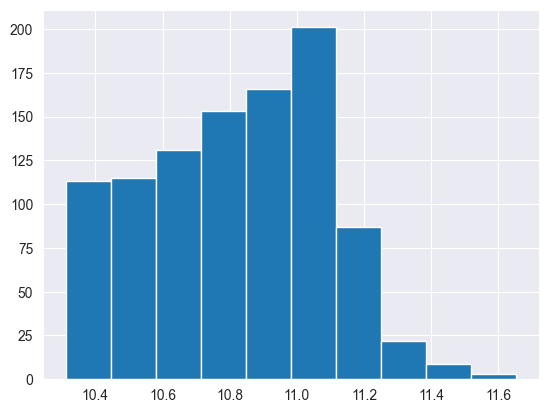

In [295]:
price_sqrt = np.log(price)
price_sqrt.skew()
plt.hist(price_sqrt)

In [296]:
new_ohc_vals['Price'] = np.log(new_ohc_vals['Price'])

<Axes: >

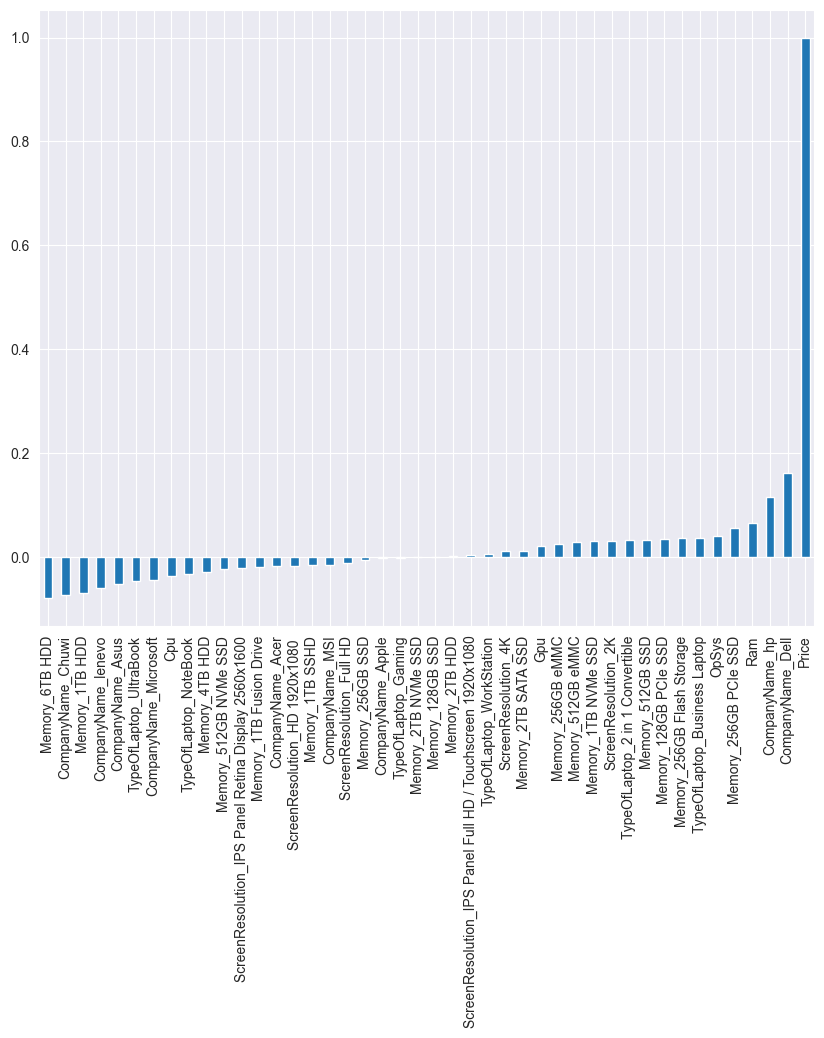

In [297]:
corelations = new_ohc_vals.corr()['Price'].sort_values()
corelations.plot(kind='bar', figsize=(10,8))

<Axes: >

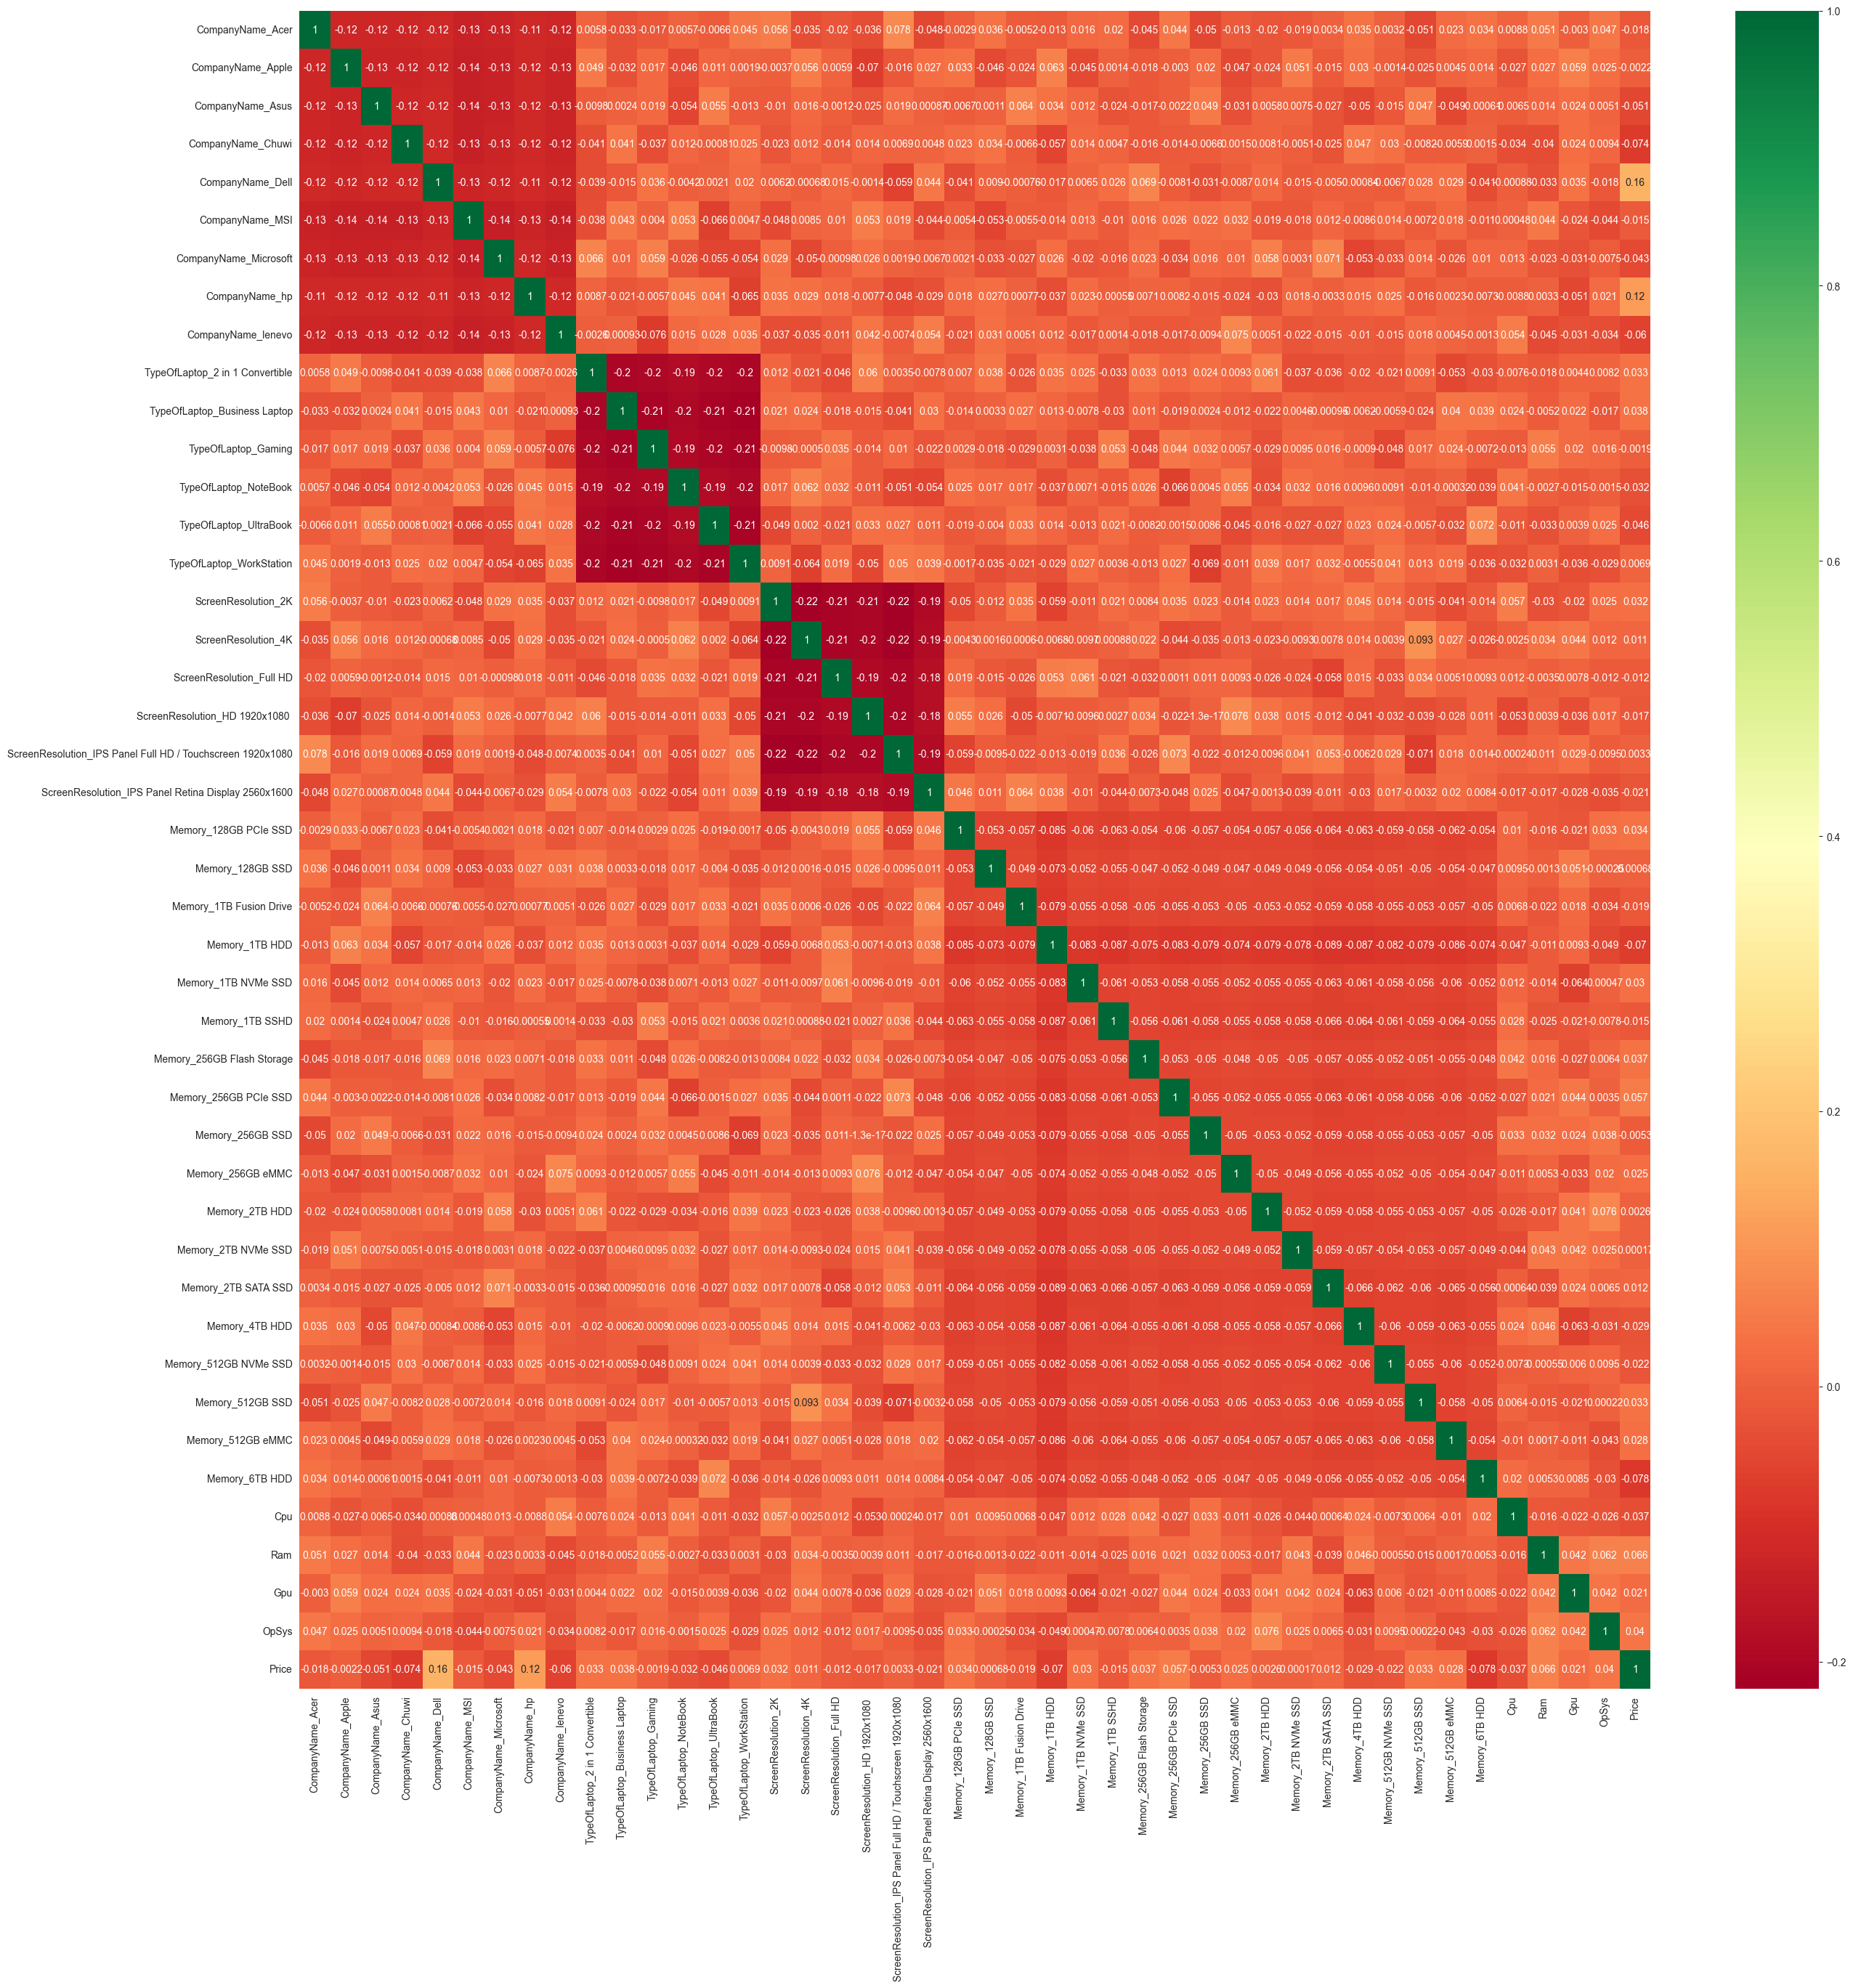

In [298]:
plt.figure(figsize=(30,30))
sns.heatmap(new_ohc_vals.corr(),annot=True,cmap='RdYlGn')

After transformation of the data and data analysis we can form and test some thesis. 

In [320]:
cn_hp = new_ohc_vals.loc[new_ohc_vals.CompanyName_hp==1]
cn_dell = new_ohc_vals[new_ohc_vals.CompanyName_Dell==1]
hp_price = cn_hp.Price
dell_price = cn_dell.Price

alpha=0.05
t_value1, p_value1 = stats.ttest_ind(hp_price, dell_price)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between dell prices and hp of laptop prices.")

else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is a difference between dell prices and hp of laptop prices.")

t_value1 =  -0.8275860032105431 , p_value1 =  0.40890132621372866
Conclusion: since p_value 0.40890132621372866 is greater than alpha 0.05 
Fail to reject the null hypothesis that there is a difference between dell prices and hp of laptop prices.


In [321]:
mem_emmc = new_ohc_vals.loc[new_ohc_vals['Memory_512GB eMMC']==1]
mem_ssd = new_ohc_vals[new_ohc_vals['Memory_512GB SSD']==1]
emmc_price = cn_hp.Price
ssd_price = cn_dell.Price

alpha=0.05
t_value1, p_value1 = stats.ttest_ind(hp_price, dell_price)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between prices of laptops that have 512GB eMMC and SSD 512GB .")

else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is a difference between prices of laptops that have 512GB eMMC and SSD 512GB.")

t_value1 =  -0.8275860032105431 , p_value1 =  0.40890132621372866
Conclusion: since p_value 0.40890132621372866 is greater than alpha 0.05 
Fail to reject the null hypothesis that there is a difference between prices of laptops that have 512GB eMMC and SSD 512GB.


In [322]:
new_ohc_vals.groupby([new_ohc_vals.Ram])['Price'].mean()

Ram
1    10.773783
2    10.838858
3    10.809487
4    10.838518
Name: Price, dtype: float64

<Axes: xlabel='Ram', ylabel='Price'>

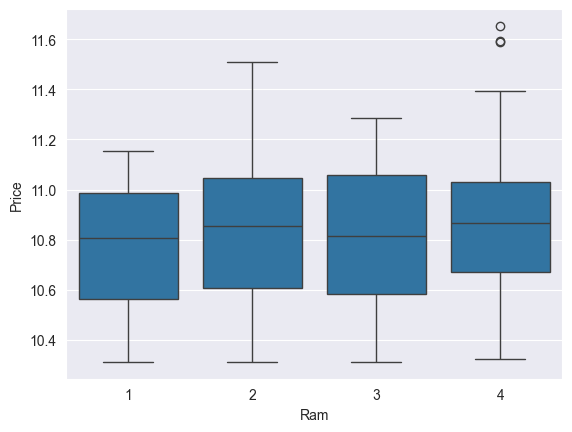

In [324]:
sns.boxplot(x=new_ohc_vals.Ram,y=new_ohc_vals.Price, data=new_ohc_vals)

In [326]:
formula = 'Price ~ C(Ram)'
model = ols(formula, new_ohc_vals).fit()
aov_frame = anova_lm(model)
aov_frame

,df,sum_sq,mean_sq,F,PR(>F)
C(Ram),3.0,0.706258,0.235419,3.294187,0.019987
Residual,996.0,71.179190,0.071465,NaN,NaN


Conclusion: p-value is 0.019987, and it is lower than the alpha (0.05), therefore we reject the null hypothesis and conclude that the mean prices of laptops with 12GB, 8GB, 16GB, 4GB are same.

## Next steps in analysing data

We need to make sure that our data is properly scaled and clean it to the point where only impactful features remain.
We need to group our data in meaningful way so that we can use it for train_test_split down the line. 

## Conclusion 

This data set is perfectly constructed for the educational purposes and for this project in particular. It first and foremost gives you a variety of object data type features that need transforming and grouping. It is excellent for testing hypothesis in various ways because of sheer feature value variety.

Battery capacity or duration would be a good addition to this dataset.  

**<p style="text-align: center;">Filip Jovanović</p>**